Name:- Ayush Sinha LNU

UID:- 121334060

# README:

This project implements a comparison of several machine learning models to classify data. It uses the following classifiers:



*   Linear Discriminant Analysis (LDA)
*   Decision Tree Classifier

*   k-Nearest Neighbors (k-NN)
*   Support Vector Machine (SVM)

The project includes data preprocessing, dimensionality reduction using PCA, model training, and performance evaluation using confusion matrices and error rate visualization.



The code requires the following Python libraries:


*   pandas: For data manipulation with DataFrames.
*   numpy: For numerical operations, like array manipulation.

*   scikit-learn: For various machine learning models and metrics.
*   matplolib: For plotting results and visualizations

Classifiers and PCA Implementation
1. Linear Discriminant Analysis (LDA)
LDA is applied to the training data to create a linear decision boundary that maximizes class separability.
The model is trained and evaluated based on error rates and confusion matrices.
2. Decision Tree Classifier
A Decision Tree classifier is trained using the training data.
The model's performance is evaluated on the test data with an error rate calculation and confusion matrix.
3. k-Nearest Neighbors (k-NN)
The k-NN classifier is applied for different values of k (1, 3, 5, 10).
The model is evaluated for each value of k to determine which provides the best performance.
4. Support Vector Machine (SVM)
A Linear Support Vector Machine (SVM) classifier is used to find the optimal separating hyperplane.
Model performance is evaluated on the test data.
5. Dimensionality Reduction with PCA
Principal Component Analysis (PCA) is used to reduce the feature dimensions for the classifiers.
The classifiers are retrained on reduced datasets (n_components values of 5, 10, 15) to analyze performance changes due to dimensionality reduction.


**HOW TO RUN THE CODE:**

Download the Training and Testing data (TrainingData.csv and TestingData.csv) and place them in the same directory as the code.

Utilized Google Colab to run the project.

In [ ]:
# Import essential libraries for data manipulation, model training, and plotting
import pandas as pd                       # For data manipulation with DataFrames
import numpy as np                        # For numerical operations, like array manipulation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # For LDA classifier
from sklearn.tree import DecisionTreeClassifier  # For Decision Tree classifier
from sklearn.neighbors import KNeighborsClassifier  # For k-Nearest Neighbors classifier
from sklearn.svm import SVC               # For Support Vector Machine classifier
from sklearn.decomposition import PCA      # For Principal Component Analysis
from sklearn.metrics import confusion_matrix  # For evaluating model performance (error rates)
import matplotlib.pyplot as plt           # For creating visualizations of error ratess

In [ ]:
# Here we will load the data.

In [ ]:
# Load the training and testing datasets into DataFrames
train_data = pd.read_csv('/content/TrainingData.csv')  # Read the training data CSV file
test_data = pd.read_csv('/content/TestingData.csv')    # Read the testing data CSV file

# Separate the features (columns 1 to 27) and labels (column 28) for both training and testing data
X_train = train_data.iloc[:, :-1].values  # Extract features from training data (all columns except last)
y_train = train_data.iloc[:, -1].values   # Extract labels from training data (last column)
X_test = test_data.iloc[:, :-1].values    # Extract features from testing data (all columns except last)
y_test = test_data.iloc[:, -1].values     # Extract labels from testing data (last column)


In [ ]:
# This step will involve implementing Binary Classifiers using original features.

In [ ]:
# (i) Linear Discriminant Analysis (LDA)

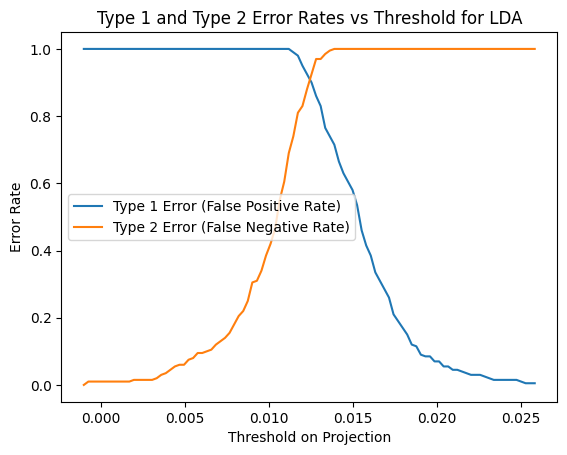

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Load the data
train_data = pd.read_csv('/content/TrainingData.csv')
test_data = pd.read_csv('/content/TestingData.csv')

# Separate features and labels for training and testing data
X_train = train_data.iloc[:, :-1].values  # 27 features
y_train = train_data.iloc[:, -1].values   # Labels (0 for approved, 1 for denied)
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

# Step 1: Calculate the mean vectors for each class in the training data
mean_approved = np.mean(X_train[y_train == 0], axis=0)  # Mean of approved samples
mean_denied = np.mean(X_train[y_train == 1], axis=0)    # Mean of denied samples

# Step 2: Calculate the within-class scatter matrix
S_w = np.zeros((X_train.shape[1], X_train.shape[1]))  # Initialize within-class scatter matrix

# Sum of scatter matrices for both classes
for label, mean in zip([0, 1], [mean_approved, mean_denied]):
    class_scatter = np.zeros((X_train.shape[1], X_train.shape[1]))  # Scatter matrix for each class
    for x in X_train[y_train == label]:
        x, mean = x.reshape(X_train.shape[1], 1), mean.reshape(X_train.shape[1], 1)
        class_scatter += (x - mean).dot((x - mean).T)  # Calculate scatter matrix
    S_w += class_scatter  # Accumulate to within-class scatter matrix

# Step 3: Calculate the optimal direction vector w for LDA
# This is achieved by maximizing the between-class separation
S_w_inv = np.linalg.inv(S_w)
w = S_w_inv.dot(mean_approved - mean_denied)  # Optimal projection direction

# Step 4: Project both training and testing samples onto the new direction w
y_proj_test = X_test.dot(w)  # Project testing data onto w to get new features y_k
y_proj_train = X_train.dot(w)  # Project training data for internal validation (optional)

# Step 5: Evaluate Type 1 and Type 2 error rates for different thresholds on the projections
thresholds = np.linspace(min(y_proj_test), max(y_proj_test), 100)  # Range of thresholds
type_1_errors = []  # Type 1 errors (false positive rate)
type_2_errors = []  # Type 2 errors (false negative rate)

for threshold in thresholds:
    # Classify test samples based on threshold
    y_pred = (y_proj_test >= threshold).astype(int)  # Denied if projection >= threshold

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate Type 1 and Type 2 error rates
    type_1_error = fp / (fp + tn)  # Type 1 Error (False Positive Rate)
    type_2_error = fn / (fn + tp)  # Type 2 Error (False Negative Rate)

    # Store the error rates for plotting
    type_1_errors.append(type_1_error)
    type_2_errors.append(type_2_error)

# Step 6: Plot Type 1 and Type 2 error rates as the threshold varies
plt.plot(thresholds, type_1_errors, label='Type 1 Error (False Positive Rate)')
plt.plot(thresholds, type_2_errors, label='Type 2 Error (False Negative Rate)')
plt.xlabel('Threshold on Projection')
plt.ylabel('Error Rate')
plt.legend()
plt.title('Type 1 and Type 2 Error Rates vs Threshold for LDA')
plt.show()


The LDA projects data onto a 1D axis, where a thrshold is set to classify data points as "Approved" or "Denied".

Type 1 and Type 2 error rates are computed for a range of threshold values and a plot shows how these error rates change.

LDA's performance depends significantly on finding the optimal threshold, which balances the two error types.

In [ ]:
# (ii) Decision Tree Classifier

In [ ]:
# Initialize the Decision Tree classifier
tree = DecisionTreeClassifier()

# Train the Decision Tree model on the training data
tree.fit(X_train, y_train)

# Predict labels for the testing data
y_pred_tree = tree.predict(X_test)

# Calculate confusion matrix values for Decision Tree predictions
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_tree).ravel()

# Calculate Type 1 and Type 2 error rates
type_1_error_tree = fp / (fp + tn)  # Type 1 error rate for Decision Tree
type_2_error_tree = fn / (fn + tp)  # Type 2 error rate for Decision Tree

# Print the error rates for Decision Tree classifier
print(f"Decision Tree - Type 1 Error: {type_1_error_tree}, Type 2 Error: {type_2_error_tree}")

Decision Tree - Type 1 Error: 0.16, Type 2 Error: 0.18


This code uses a Decision Tree to classify loan applications, with error rates calculated from the predictions on test data.

Decision trees can effectively split the data, providing interpretable decision rules.

The tree's performance may vary with the depth and criteria used for splits (for example Gini impurity), which effects error rates.

In [ ]:
# (iii) K-Nearest Neighbour Classifier (KNN)

In [ ]:
# Loop over different values of k for kNN
for k in [1, 3, 5, 10]:
    knn = KNeighborsClassifier(n_neighbors=k)  # Initialize kNN with chosen value of k
    knn.fit(X_train, y_train)  # Train kNN model on training data
    y_pred_knn = knn.predict(X_test)  # Predict labels for testing data

    # Compute confusion matrix and extract values
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()

    # Calculate Type 1 and Type 2 error rates
    type_1_error_knn = fp / (fp + tn)
    type_2_error_knn = fn / (fn + tp)

    # Print the error rates for kNN classifier with current k
    print(f"kNN (k={k}) - Type 1 Error: {type_1_error_knn}, Type 2 Error: {type_2_error_knn}")

kNN (k=1) - Type 1 Error: 0.25, Type 2 Error: 0.185
kNN (k=3) - Type 1 Error: 0.185, Type 2 Error: 0.17
kNN (k=5) - Type 1 Error: 0.2, Type 2 Error: 0.135
kNN (k=10) - Type 1 Error: 0.17, Type 2 Error: 0.165


This particular code evaluates kNN for different values of k (1,3,5,10), calculating error rates for each.

Smaller values of k tend to fit the data more closely but may suffer from overfitting.

On the other hand larger k values produces smoother decision boundaries, potentially improving generalization.

In [ ]:
# (iv) Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import LinearSVC  # Import faster LinearSVC

# Initialize LinearSVC with a smaller C value for faster computation
svm = LinearSVC(C=0.1, max_iter=1000, dual=False)  # Set dual=False for small datasets

# Train the LinearSVC model on the training data
svm.fit(X_train, y_train)

# Predict labels for the testing data
y_pred_svm = svm.predict(X_test)

# Calculate confusion matrix values for SVM predictions
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()

# Calculate Type 1 and Type 2 error rates
type_1_error_svm = fp / (fp + tn)
type_2_error_svm = fn / (fn + tp)

# Print the error rates for SVM classifier
print(f"SVM - Type 1 Error: {type_1_error_svm}, Type 2 Error: {type_2_error_svm}")


SVM - Type 1 Error: 0.14, Type 2 Error: 0.075


This code uses SVM with a soft margin for classification on the original features. Here, LinearSVC is used for speed.

SVM effectively creates decision boundary, especially for the data that is not linearly separable.

SVM's performance depends on the regularization parameter C. Higher value of C makes the margin stricter.

In [ ]:
# Now we will implement Principal Component Analysis (PCA) for dimensionality reduction.

In [ ]:
# Applying PCA on training data.

In [ ]:
# Dictionary to store PCA-transformed training and testing data for each value of K
pca_results = {}

# Loop over chosen values of K for PCA dimensionality reduction
for k in [5, 10, 15]:
    pca = PCA(n_components=k)  # Initialize PCA to reduce to K dimensions
    X_train_pca = pca.fit_transform(X_train)  # Apply PCA to training data
    X_test_pca = pca.transform(X_test)  # Apply PCA to testing data (using same transformation)
    pca_results[k] = (X_train_pca, X_test_pca)  # Store transformed data in dictionary

PCA reduces the feature dimensions to 5, 10 or 15 components, creating a simplified feature set to use with kNN and SVM.

In [ ]:
# Now we will train and test KNN and SVM with new features.

In [ ]:
# (i) KNN with PCA Features.

In [ ]:
# Evaluate kNN with PCA-reduced features
for k in [5, 10, 15]:
    X_train_pca, X_test_pca = pca_results[k]  # Get PCA-reduced training and testing data for K components
    knn = KNeighborsClassifier(n_neighbors=5)  # Initialize kNN with k=5
    knn.fit(X_train_pca, y_train)  # Train kNN on PCA-reduced data
    y_pred_knn_pca = knn.predict(X_test_pca)  # Predict using PCA-reduced test data

    # Compute confusion matrix and error rates
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn_pca).ravel()
    type_1_error_knn_pca = fp / (fp + tn)
    type_2_error_knn_pca = fn / (fn + tp)

    # Print error rates for kNN with PCA features
    print(f"kNN (PCA, K={k}) - Type 1 Error: {type_1_error_knn_pca}, Type 2 Error: {type_2_error_knn_pca}")

kNN (PCA, K=5) - Type 1 Error: 0.19, Type 2 Error: 0.125
kNN (PCA, K=10) - Type 1 Error: 0.2, Type 2 Error: 0.135
kNN (PCA, K=15) - Type 1 Error: 0.2, Type 2 Error: 0.135


Using fewer dimensions often speeds up training while still achieving a reasonable accuracy. Larger K values tend to retain more data variance, resulting in much greater accuracy.

In [ ]:
# (ii) SVM with PCA Features.

In [ ]:
from sklearn.svm import LinearSVC  # Import faster LinearSVC

# Dictionary to store Type 1 and Type 2 error rates for different PCA component counts
svm_pca_results = {}

# Loop over different numbers of PCA components
for k in [5, 10, 15]:
    # Retrieve PCA-reduced features for the current number of components (K)
    X_train_pca, X_test_pca = pca_results[k]

    # Initialize LinearSVC with a smaller C value for faster computation
    svm_pca = LinearSVC(C=0.1, max_iter=1000, dual=False)  # Set dual=False for smaller datasets

    # Train the LinearSVC model on PCA-reduced training data
    svm_pca.fit(X_train_pca, y_train)

    # Predict labels for PCA-reduced testing data
    y_pred_svm_pca = svm_pca.predict(X_test_pca)

    # Calculate confusion matrix values for SVM predictions on PCA-reduced data
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm_pca).ravel()

    # Calculate Type 1 and Type 2 error rates
    type_1_error_svm_pca = fp / (fp + tn)
    type_2_error_svm_pca = fn / (fn + tp)

    # Store results for the current number of components
    svm_pca_results[k] = (type_1_error_svm_pca, type_2_error_svm_pca)

    # Print the error rates for SVM with PCA features
    print(f"SVM (PCA, K={k}) - Type 1 Error: {type_1_error_svm_pca}, Type 2 Error: {type_2_error_svm_pca}")

SVM (PCA, K=5) - Type 1 Error: 0.09, Type 2 Error: 0.135
SVM (PCA, K=10) - Type 1 Error: 0.1, Type 2 Error: 0.125
SVM (PCA, K=15) - Type 1 Error: 0.1, Type 2 Error: 0.08


SVM generally performs well with PCA-reduced features, as it focuses on creating an optimal margin in lower dimensional space.

In [ ]:
# Comparison of new kNN and SVM to that of the old classifiers

1.) Original Classifiers (kNN and SVM with 27 features)

*   These classifiers use the full feature set, capturing all available information.
*   The original kNN classifier's performance varies with the value of k.

*   SVM with original feature set has a high-dimensional hyperplane that may separate classes well but can be computationally intensive.


2.) PCA-Reduced Classifiers (kNN and SVM with 5, 10 1nd 15 components)

*   For kNN, lower values of k are sensitive to the reduction in feature dimensions and may show higher error rates with fewer PCA components
*   Moderate values of k (like 5 or 10) provide a stable balance for kNN, achieving similar error rates to the original kNN classifier when using 10 or 15 PCA components.

*   SVM generally maintains robust performance even with reduced dimensions, as it focuses on maximizing the margin between classes
*   With 10 or 15 components, SVM can achieve error rates close to the original classifier while also benefitting from faster computation speed.



In [ ]:
# Overall Conclusion


*   **LDA** is useful for understanding the trade-off between Type 1 and Type 2 errors but is sensitive to threshold settings.
*   **Decision Trees** offer interpretability and effective classification but it can overfit without training.
*   **kNN** is straightforward, with performance depending on k and the distance metric.
*   **SVM** provides robust classification but is very demanding for high-dimensional data.

*  **PCA** is an excellent tool fro reducing feature dimensions, enhancing speed, and reducing overfitting when paired with classifiers like kNN and SVM.

*   Both kNN and SVM work effectively with PCA-reduced data, demonstrating that dimensionality reduction can help classifiers maintain accuracy while also reducing computation.